# SymPy
---
<img src="https://www.sympy.org/static/images/logo.png" style="width: 20%;"/>

与数值运算不同，符号计算（Symbolic Computing）是一种完全不同的计算模式。在符号计算软件中（Computer Algebra System， CAS）中，数学对象和表达式用符号表示，以解析方式进行变换和计算。在使用数值计算之前，通过解析推导，可以降低最终待解决问题的复杂度和解的空间大小。

在Python科学计算环境中，主要用到的符号计算库是SymPy。SymPy完全使用Python编写，提供了一系列用于解析计算和符号计算的工具。

## 参考资料
[SymPy官方网站](https://www.sympy.org/en/index.html) 

[在线练习环境](https://live.sympy.org/)

## 导入SymPy
---

SymPy没有官方缩写（sp是SciPy的官方缩写）。在使用时，要注意避免与NumPy和SciPy产生函数命名冲突。

In [1]:
import sympy
sympy.init_printing()  # 使用MathJax JavaScript格式化显示数学表达式
sympy.oo

oo

## 符号
---

SymPy的核心功能是将数学符号表示为Python对象。用SymPy来分析和解决问题的第一步，是为描述问题所需的各种数学变量和表达式创建符号。符号名是字符串，可以包含类似LaTex的编辑。，这样可以在IPython的Rich Display System中漂亮地显示符号。创建Symbol对象的函数为sympy.Symbol、sympy.symbols和symbol.var。

In [2]:
x = sympy.Symbol("x", real=True) # 增加假设条件，指定对象代表的符号类型。
x.is_real

True

| 假设条件关键词 | 属性 | 说明 |
|---|---|---|
| real 和 imaginary | is_real 和 is_imaginary | 符号表示实数或虚数 |
| positive 和 negative  | is_positive 和 is_negative | 符号表示正数或负数 |
| integer| is_integer | 符号表示整数 |
| prime | is_prime | 符号表示质数 |
| finite 和 infinite | is_finite 和 is_infinite | 符号表示有限数和无限数 |

In [96]:
x = sympy.Symbol("x")
sympy.sqrt(x ** 2)  # SymPy无法简化结果

sqrt(x**2)

In [97]:
y = sympy.Symbol("y", positive=True)
sympy.sqrt(y ** 2)  # SymPy可以简化结果

y

In [99]:
n = sympy.Symbol("n", odd=True)
sympy.cos(n * sympy.pi)

-1

使用`sympy.symbols`同时创建多个符号

In [6]:
a, b, c = sympy.symbols("a, b, c", positive=True)

### 数字
我们不能直接使用Python内置的整数类型int、浮点类型float等。 SymPy提供了sympy.Integer和sympy.Float类来便是SymPy框架中的整数和浮点数。

#### 整数

SymPy中的整数类型是任意精度的。

In [100]:
i = sympy.Integer(19)
i ** 50

8663234049605954426644038200675212212900743262211018069459689001

注意Integer示例和Symbol实例是存在差异的。

In [8]:
type(i)

sympy.core.numbers.Integer

In [9]:
type(n)

sympy.core.symbol.Symbol

#### 浮点数

与Integer类似，Float对象也是任意精度的，可以使用可选参数指定Float对象的精度（有效位数）。

In [10]:
sympy.Float('0.3')

0.300000000000000

需要注意，为了正确表示Float对象0.3，需要使用字符串'0.3'来初始化对象，而不是使用Python内置的float 0.3，因为后者已经包含了浮点误差。

In [11]:
sympy.Float(0.3, 25)  # 25位精度

0.2999999999999999888977698

#### 有理数

将分子和分母作为参数来显式创建有理数。

In [101]:
r1 = sympy.Rational(2, 3)
r2 = sympy.Rational(4, 5)
r1 / r2

5/6

#### 常数和特殊符号

| 数学符号 | SymPy符号 | 说明 |
|---|---|---|
| $\pi$ | sympy.pi | 圆周率 |
| $e$ | sympy.E | 自然对数 |
| $\gamma$ | sympy.EularGamma | 欧拉常数 |
| $i$ | sympy.I | 虚数单位 |
| $\infty$ | sympy.oo | 正无穷 |

#### 函数

SymPy中的函数分为已定义函数和未定义函数，已应用函数和未应用函数。

In [13]:
x, y, z = sympy.symbols("x, y, z")
f = sympy.Function("f")  # 创建一个未定义未应用的函数。第一个参数为对象名称。
g = f(x,y,z)  # 指明函数的输入变量。

上述两个语句可以写为：

In [103]:
g = sympy.Function("f")(x,y,z)

In [104]:
g.free_symbols # 返回未定义函数g中所包含的符号集合。

{x, y, z}

SymPy同样支持匿名函数。

In [16]:
h = sympy.Lambda(x, x**2)
h

Lambda(x, x**2)

In [17]:
h(1+x)

(x + 1)**2

## 表达式
---

在SymPy中，数学表达式用树状结构表示，叶子代表符号，节点代表数学运算。基本数学运算包括Add，Mul和Pow等，以及用于数学分析运算的Sum，Product，Integral和Derivative。

In [18]:
x = sympy.Symbol("x")
expr = 1 + 2 * x **2 + 3 * x **3
expr

3*x**3 + 2*x**2 + 1

expr是Add的一个实例，它包含3个子表达式。下图为expr的整个表达式树。

![](Images/ExpressTree.svg)

使用arus属性可以显示遍历表达式树。

In [19]:
expr.args

(1, 2*x**2, 3*x**3)

In [20]:
expr.args[1].args

(2, x**2)

In [21]:
expr.args[1].args[1].args

(x, 2)

## 表达式操作
---

表达式树可以在等价的数学形式之间进行转换。SymPy提供的转换函数会将输入表达式是为不可变对象，并返回一个新的表达式树。

### 化简

In [22]:
expr = 2 * (x**2 - x) - x * (x + 1)
expr

2*x**2 - x*(x + 1) - 2*x

In [23]:
sympy.simplify(expr)

x*(x - 3)

In [24]:
expr.simplify()

x*(x - 3)

| 数学符号 | SymPy符号 | 
|---|---|
| sympy.simplify | 尝试各种方法化简 |
| sympy.trigsimp | 使用三角恒等式化简 |
| sympy.powsimp | 使用幂定律化简 |
| sympy.compsimp| 化简组合表达式 |
| sympy.ratsimp| 使用公分母简化表达式 |

In [108]:
expr = 2 * sympy.cos(x) * sympy.sin(x)
sympy.simplify(expr)

sin(2*x)

### 展开

当使用`sympy.simplify`的黑盒化简无法得到满意的结果，可以尝试使用更具体的代数运算手动指导SymPy获得更好的结果。这个过程中，一个重要的手段是以各种手段展开表达式。

In [26]:
expr = (x + 1) * (x + 2)
sympy.expand(expr)

x**2 + 3*x + 2

| 关键词参数 | 说明 | 
|---|---|
| mul=True | 对乘法进行展开 |
| trig=True | 对三角函数进行展开 |
| log=True | 对对数进行展开 |
| complex=True| 将表达式的实数和虚数部分分开展开 |
| power_base/power_exp=True| 展开幂表达式的底和指数 |

在`sympy.expand`中设置以上参数，等效于分别执行相关具体函数。例如`sympy.expand_mul`，`sympy.expand_trig`等

In [27]:
sympy.exp(sympy.I*a +b).expand(complex=True)

I*exp(b)*sin(a) + exp(b)*cos(a)

In [28]:
sympy.expand((a*b)**x, power_base=True)

a**x*b**x

### 因式分解

使用`sympy.factor`函数可以对表达式进行因式分解。这与设置了mul=True的`sympy.expand`刚好相反。

In [29]:
sympy.factor(x**2 - 1)

(x - 1)*(x + 1)

我们之前介绍过的化简函数，包括`sympy.trigsimp`，`sympy.powsimp`，`sympy.logsimp`等，都可以执行相应反向操作。

In [30]:
sympy.logcombine(sympy.log(a) - sympy.log(b))

log(a/b)

`sympy.collect`函数可以提取公因子。

In [31]:
expr = x + y + x * y * z
expr.collect(x)

x*(y*z + 1) + y

### 分式分解、通分、消除公因子

In [32]:
sympy.apart(1/(x**2 + 3*x+ 2), x)

-1/(x + 2) + 1/(x + 1)

In [33]:
sympy.together(1/(y*x+y) + 1/(1+x))

(y + 1)/(y*(x + 1))

In [34]:
sympy.cancel(y / (y*x + y))

1/(x + 1)

### 替换

前面我们一直关注用数学恒等式重写表达式。另一种常见操作是替换数学表达式的符号或者子表达式。在SymPy中，进行替换操作的函数有两个：sub和replace。后者可以使用通配符表达式进行替换。

In [35]:
(x + y).subs(x, y)

2*y

In [36]:
expr = x ** 2
(x + y).subs(y, expr)

x**2 + x

`subs`函数的另一个典型应用就是使用数字替代表达式中的符号进行数值计算。

In [37]:
expr = x * y + z**2 * x
values = {x:1.25, y:0.4, z:3.2}  # 定义字典
expr.subs(values)

13.3000000000000

## 数值计算
---

对符号表达式进行求值计算是一个常用操作。可以使用函数`sympy.N`或者表达式实例的`evalf`方法对SymPy表达式进行求值。

In [38]:
sympy.N(1 + sympy.pi)

4.14159265358979

In [39]:
(1 + sympy.pi).evalf(5)  # 指定结果的有效位数

4.1416

当对一系列输入值进行数值计算时，原则上可以对这些输入值进行循环，然后调用`evalf`。

In [40]:
expr = sympy.sin(sympy.pi * x * sympy.exp(x))
[expr.subs(x, i).evalf(3) for i in range(0,5)]

[0, 0.774, 0.642, 0.722, 0.944]

我们可以使用更高效的函数`sympy.lambdify`执行上述操作。

In [41]:
expr_func = sympy.lambdify(x, expr)
expr_func(1.0)

7.73942685266709e-01

需要注意，上述expr_func需要将数字作为参数，我们不能将符号直接作为参数转递给改函数。同时，上述expr_func也不兼容NumPy数组的矢量输入。为了产生NumPy数组兼容的函数，可以将'numpy'作为第三个参数传递给`sympy.lambdify`。

In [110]:
expr_func = sympy.lambdify(x, expr)
import numpy as np
xvalues = np.arange(0, 10)
expr_func(xvalues)

array([ 0.        ,  0.90929743, -0.7568025 , -0.2794155 ,  0.98935825,
       -0.54402111, -0.53657292,  0.99060736, -0.28790332, -0.75098725])

## 微积分
---

我们已经学习了SymPy中表达数学式，以及如何对这些数学表达式进行基本的化简和计算。我们现在准备探索符号微积分（符号分析）了，这是应用数学的基石，并且在整个科学和工程中有很多应用。

### 导数/微分

函数的导数描述了函数在给定点的变化率。

In [43]:
f = sympy.Function('f')(x)  # 未定义函数
sympy.diff(f, x)  # 等价于 f.diff(x)

Derivative(f(x), x)

高阶导数

In [44]:
sympy.diff(f, x, x)  # 参数列表定义了求导的变量符号

Derivative(f(x), (x, 2))

In [45]:
sympy.diff(f, x, 2)  # 第3个参数为数字时，定义了特定变量符号的求导次数

Derivative(f(x), (x, 2))

多元函数

In [46]:
g = sympy.Function('g')(x, y)
sympy.diff(g, x, y)

Derivative(g(x, y), x, y)

In [47]:
sympy.diff(g, x, 2, y, 2)

Derivative(g(x, y), (x, 2), (y, 2))

对于已定义函数和表达式，进行求导后会得到一个新的表达式。

In [48]:
expr = x**4 + x**3 + x**2 + x + 1
expr.diff(x)

4*x**3 + 3*x**2 + 2*x + 1

对于更为复杂的三角函数

In [49]:
expr = sympy.sin(x * y) * sympy.cos(x / 2)
expr.diff(x)

y*cos(x/2)*cos(x*y) - sin(x/2)*sin(x*y)/2

在以上示例中，直接对表达式调用`sympy.diff`会产生一个新的表达式。如果想要延迟计算，符号化地表示已定义表达式的导数，可以创建`sympy.Derivative`类的实例，把表达式作为第一个参数，后面的参数就是需要求导的符号。

In [50]:
d = sympy.Derivative(sympy.exp(sympy.cos(x)), x)
d

Derivative(exp(cos(x)), x)

通过`sympy.Derivative`类的doit方法，可以计算表达式的导数形式。

In [51]:
d.doit()

-exp(cos(x))*sin(x)

### 积分

在SymPy中，可以使用`sympy.integrate`函数计算积分，使用`sympy.Integral`函数符号化表示积分（类似`sympy.Derivative`，可以后续调用doit方法进行显式计算）。积分有两种基本形式：定积分和不定积分，后者没有积分极限，表示为反导函数（antiderivative）。

In [52]:
a, b, x, y = sympy.symbols("a, b, x, y")
f = sympy.Function('f')(x)
sympy.integrate(f) # 不定积分

Integral(f(x), x)

In [53]:
sympy.integrate(f, (x, a, b))  # 定积分

Integral(f(x), (x, a, b))

当该方法被应用到显示的函数时，积分会进行相应的计算。

In [54]:
sympy.integrate(sympy.sin(x))

-cos(x)

In [55]:
sympy.integrate(sympy.sin(x), (x, a, b))

cos(a) - cos(b)

使用SymPy的$\infty$符号，可以让定积分的积分区间包含正无穷或负无穷。

In [56]:
sympy.integrate(sympy.exp(-x**2), (x, 0, sympy.oo))

sqrt(pi)/2

In [114]:
a, b, c = sympy.symbols("a, b, c", positive=True)  # 假设条件关键词

sympy.integrate(a * sympy.exp(-((x-b)/c)**2), (x, -sympy.oo, sympy.oo))

sqrt(pi)*a*c

如果SymPy不能给出积分的符号化结果，会返回一个`sympy.Integral`实例。

In [58]:
sympy.integrate(sympy.sin(x * sympy.cos(x)))

Integral(sin(x*cos(x)), x)

使用`sympy.integrate`也可以计算多元函数的积分。通过传递多个符号或元组（元组包含了符号以及他们的积分区间），可以计算多重积分。

In [59]:
expr = (x + y)**2
sympy.integrate(expr, x, y)

x**3*y/3 + x**2*y**2/2 + x*y**3/3

In [60]:
sympy.integrate(expr, (x, 0, 1), (y, 0, 1))

7/6

### 级数展开

级数展开时很多计算领域的重要工具。通过级数展开，可以将任意函数写为一个多项式，其系数由函数的导数在展开处的点给出。

在数学上，对于一个在实数或复数$a$邻域上，以实数作为变量或以复数作为变量的函数，并且是无穷可微的函数$f(x)$，它的泰勒级数是以下这种形式的幂级数：
$$\sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!} (x-a)^{n}$$

`sympy.series`函数的第一个参数是需要展开的函数或表达式，第二个参数是需要展开的符号。另外，还可以指定围绕哪个点展开（默认x0=0）和展开的阶数（默认n=6）。

In [61]:
x, y = sympy.symbols("x, y")
f = sympy.Function("f")(x)
sympy.series(f, x)

f(0) + x*Subs(Derivative(f(xi), xi), xi, 0) + x**2*Subs(Derivative(f(xi), (xi, 2)), xi, 0)/2 + x**3*Subs(Derivative(f(xi), (xi, 3)), xi, 0)/6 + x**4*Subs(Derivative(f(xi), (xi, 4)), xi, 0)/24 + x**5*Subs(Derivative(f(xi), (xi, 5)), xi, 0)/120 + O(x**6)

为了改变展开的点，可以设置x0参数。

In [62]:
x0 = sympy.Symbol("{x_0}")
f.series(x, x0, n=2)

f({x_0}) + (x - {x_0})*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, {x_0}) + O((x - {x_0})**2, (x, {x_0}))

截断产生的误差用高阶无穷小项$O(x-x_0)^n$表示。对于数值计算，需要从表达式中移除误差项。

In [63]:
f.series(x, x0, n=2).removeO()

(x - {x_0})*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, {x_0}) + f({x_0})

对于特定函数和表达式，级数展开可以得到计算结果。

In [115]:
sympy.sin(x).series().removeO()

x**5/120 - x**3/6 + x

In [65]:
(1/(1+x)).series()

1 - x + x**2 - x**3 + x**4 - x**5 + O(x**6)

### 极限

微积分的另外一个重要工具是极限。导数也可以用极限来定义。

$$f'(x_0)=\lim_{x \to x_0}\frac{f(x)-f(x_0)}{x - x_0}$$

在SymPy中，可以使用`sympy.limit`来求极限。

In [66]:
sympy.limit(sympy.sin(x) / x, x, 0)

1

也可以使用`sympy.limit`来计算符号的极限。

In [67]:
x, h = sympy.symbols("x, h")
f = sympy.Function('f')
diff_limit = (f(x + h) - f(x))/h   # 求导
sympy.limit(diff_limit.subs(f, sympy.sin), h, 0)

cos(x)

In [68]:
sympy.limit(diff_limit.subs(f, sympy.cos), h, 0)

-sin(x)

另一个更实际的例子是使用极限来研究当自变量趋向于无穷时函数的渐近行为。例如对于函数$f(x)=(x^2-3x)/(2x-2)$，当$x$不断增大时，$f(x) \to px+q$。

In [69]:
expr = (x**2 - 3*x) / (2*x - 2)
p = sympy.limit(expr/x, x, sympy.oo)
q = sympy.limit(expr - p*x, x, sympy.oo)
p, q

(1/2, -1)

### 和与积

SymPy同样支持累加符号$\Sigma$和累积符号$\Pi$。`sympy.Sum`和`sympy.Product`的第一个参数为表达式，第二个参数是一个元组($n, n_1, n_2$)，后两者指定了运算中的上下限。

In [70]:
n = sympy.symbols("n", integer=True)
x = sympy.Sum(1/(n**2), (n, 1, sympy.oo))
x

Sum(n**(-2), (n, 1, oo))

In [71]:
x.doit()

pi**2/6

In [72]:
x = sympy.Product(n, (n, 1, 7))
x

Product(n, (n, 1, 7))

In [73]:
x.doit()

5040

## 方程
---

方程求解是数学的基础应用。SymPy可以符号化求解各种方程，但是原则上很多方程没有解析解。如果方程或方程组有解析解，SymPy有可能找到解。否则只能得到数值解。

例如一元二次方程$x^2 + 2x + 3 = 0$的解可以使用`sympy.solve`函数获取。

In [74]:
x = sympy.symbols("x")
sympy.solve(x**2 + 2*x - 3)

[-3, 1]

当表达式包含多个符号时，待求解的变量需要作为第二个参数传递给`sympy.solve`函数。

In [75]:
a, b, c = sympy.symbols("a, b, c")
sympy.solve(a * x**2 + b * x + c, x)

[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]

如果遇到无代数解，或SymPy无法求解的情况，SymPy会返回一个形式解。如果需要的话，可以生成数值解。

In [76]:
sympy.solve(x**5 - x**2 + 1, x)

[CRootOf(x**5 - x**2 + 1, 0),
 CRootOf(x**5 - x**2 + 1, 1),
 CRootOf(x**5 - x**2 + 1, 2),
 CRootOf(x**5 - x**2 + 1, 3),
 CRootOf(x**5 - x**2 + 1, 4)]

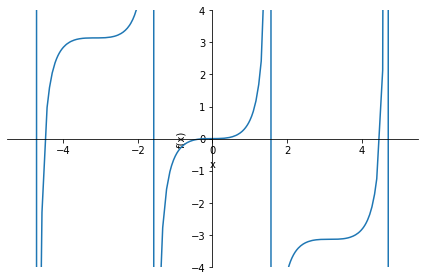

In [119]:
sympy.plotting.plot(sympy.tan(x) - x, (x,-5,5), ylim=[-4,4])

In [120]:
try:
    sympy.solve(sympy.tan(x) - x, x)
except NotImplementedError:
    print("No algorithms are implemented to solve equation")

No algorithms are implemented to solve equation


对于SymPy无法处理的问题，可以尝试使用更为专业的[Mathematica](https://www.wolframalpha.com/input?i2d=true&i=tan+x+%2B+x+%3D+0)解决。

在SymPy中求解多个未知变量的方程组，需要传递的参数不是单个表达式，而是方程组中表达式的列表。

In [78]:
eq1 = x + 2 * y - 1
eq2 = x - y + 1
sympy.solve([eq1, eq2], [x, y])  # 默认以字典的形式返回每个解。

{x: -1/3, y: 2/3}

对字典形式的解很方便可以验证。

In [79]:
sol = sympy.solve([eq1, eq2], [x, y])
[eq1.subs(sol), eq2.subs(sol)]

[0, 0]

## 线性代数
---

线性代数主要涉及向量、向量空间以及向量空间之间的线性映射（映射关系可以表示为矩阵）。SymPy中使用`sympy.Matrix`类来表示向量和矩阵，其中的元素可以是数字，符号和表达式。

In [80]:
sympy.Matrix([1,2])

Matrix([
[1],
[2]])

In [81]:
sympy.Matrix([[1,2]])

Matrix([[1, 2]])

In [82]:
sympy.Matrix([[1, 2], [3, 4]])

Matrix([
[1, 2],
[3, 4]])

需要注意，与NumPy中的多维数组不同，`sympy.Matrix`对象仅适用于二维数组。

另一种创建`sympy.Matrix`对象的方法是把矩阵的列数，函数和一个函数作为参数传递给构造函数。

In [83]:
sympy.Matrix(3, 4, lambda m,n: 10 * m + n)

Matrix([
[ 0,  1,  2,  3],
[10, 11, 12, 13],
[20, 21, 22, 23]])

有别于其他数据结构，SymPy矩阵最强大的功能在于其元素可以是表达式。

In [84]:
a, b, c, d = sympy.symbols("a, b, c, d")
M = sympy.Matrix([[a, b], [c, d]])
M

Matrix([
[a, b],
[c, d]])

这样的矩阵可以用于计算。乘法运算符`*`表示矩阵乘法。

In [85]:
M * M

Matrix([
[a**2 + b*c,  a*b + b*d],
[ a*c + c*d, b*c + d**2]])

In [86]:
x = sympy.Matrix(sympy.symbols("x_1, x_2"))
M * x

Matrix([
[a*x_1 + b*x_2],
[c*x_1 + d*x_2]])

SymPy矩阵中常用的函数和方法

| 函数/方法 | 说明 | 
|---|---|
| transpose/T | 计算矩阵的转置矩阵 |
| adjoint/H | 计算矩阵的伴随矩阵 |
| trace | 计算矩阵的迹（主对角线元素和） |
| det | 计算矩阵的行列式 |
| inv | 计算矩阵的逆矩阵 |
| LUdecomposition | 计算矩阵的LU分解 |
| LUsolve | 使用LU分解求$Mx=b$形式的线性方程组 |
| QRdecompositon | QR分解 |
| QRsolve | 使用QR分解求$Mx=b$形式的线性方程组 |
| diagonalize | 对矩阵进行对角化，使之可以写成$D=P^{-1}MP$，$D$是对角矩阵 |
| norm | 计算矩阵的范数 |
| nullspace | 计算矩阵的零空间 |
| rank | 计算矩阵的等级 |
| sigular_values | 计算矩阵的奇异值 |
| solve | 求$Mx=b$形式的线性方程组 |

下面我们使用SymPy进行符号线性代数求解。
$$x + py = b_1$$
$$qx + y = b_2$$

下面是上述方程的矩阵形式。
$$\left(\begin{matrix} 1 & p \\ q & 1 \end{matrix}\right) \left[\begin{matrix} x \\ y \end{matrix}\right] =  \left[\begin{matrix} b_1 \\ b_2 \end{matrix}\right]$$

In [87]:
p, q = sympy.symbols("p, q")
M = sympy.Matrix([[1, p], [q, 1]])
b = sympy.Matrix(sympy.symbols("b_1, b_2"))
M.solve(b)

Matrix([
[(-b_1 + b_2*p)/(p*q - 1)],
[ (b_1*q - b_2)/(p*q - 1)]])

In [88]:
%timeit M.solve(b)

18 ms ± 285 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [89]:
%timeit M.LUsolve(b)

531 µs ± 13 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [90]:
%timeit M.inv() * b

13.6 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 微分方程
---

凡含有参数，未知函数和未知函数导数 (或微分) 的方程，称为微分方程，有时简称为方程，未知函数是一元函数的微分方程称作常微分方程，未知函数是多元函数的微分方程称作偏微分方程。

$$f\left(x, \frac{d^n y}{dx^n},\frac{d^{(n-1)} y}{dx^{(n-1)}},\cdots, \frac{dy}{dx}, y\right)=0$$

SymPy提供了`sympy.dsolve`函数用于求解常微分方程（[ODE](https://docs.sympy.org/dev/modules/solvers/ode.html)），和`sympy.pdsolve`函数用于求解偏微分方程（[PDE](https://docs.sympy.org/dev/modules/solvers/pde.html)）。可选参数hint指明了求解使用的方法。

### 常微分方程
无摩擦平面上，固定在理想弹簧上质点的运动方程可以用以下一阶齐次线性方程描述：
$$\frac{d^2x}{dt^2}=-kx$$

In [91]:
t, k = sympy.symbols("t, k", positive=True)
x = sympy.Function('x')(t)
g = sympy.diff(x(t), t, 2) + k*x(t)
ans = sympy.dsolve(g, x(t))
ans

Eq(x(t), C1*sin(sqrt(k)*t) + C2*cos(sqrt(k)*t))

对于阻尼系统，其运动方程为：
$$\frac{d^2x}{dt^2}=-kx-c\frac{dx}{dt} $$

In [92]:
t, k, c = sympy.symbols("t, k, c", positive=True)
x = sympy.Function('x')
g = sympy.diff(x(t), t, 2) + c*sympy.diff(x(t), t)  + k*x(t)
ans = sympy.dsolve(g, x(t))
ans

Eq(x(t), C1*exp(t*(-c - sqrt(c**2 - 4*k))/2) + C2*exp(t*(-c + sqrt(c**2 - 4*k))/2))

## 绘图
---

SymPy支持基本的函数作图。后续章节我们会使用高级图形工具Matplotlib。

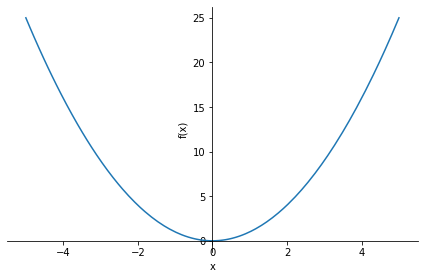

In [93]:
x = sympy.symbols("x")
sympy.plotting.plot(x**2, (x,-5,5))